In [2]:
# %matplotlib tk
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import cv2 as cv
import numpy as np

In [3]:
# class PointPicker:
#     def __init__(self, imgplot, img, color=(255,0,0), radius=20, thickness=20):
#         self.imgplot = imgplot
#         self.img = img
#         self.color = color
#         self.radius = radius
#         self.thickness = thickness
#         self.cid = imgplot.figure.canvas.mpl_connect('button_press_event', self)
#         self.points = []
    
#     def __call__(self, event):
#         if event.inaxes != self.imgplot.axes: 
#             return
#         ix = event.xdata
#         iy = event.ydata
#         print(f'x={ix}, y={iy}')
#         self.img = cv.circle(self.img, (int(ix), int(iy)), self.radius, self.color, self.thickness)
#         self.points.append((int(ix), int(iy)))
        
#         imgplot.set_array(self.img)
#         self.imgplot.figure.canvas.draw()

In [4]:
# img1 = cv.imread('data/1-left.jpeg')         
        
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# imgplot = plt.imshow(img1)
# point_picker = PointPicker(imgplot, img1)
# plt.show()

In [5]:
# print(point_picker.points)

In [6]:
# img2 = cv.imread('data/1-right.jpeg')
        
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# imgplot = plt.imshow(img2)
# point_picker = PointPicker(imgplot, img2)
# plt.show()

In [7]:
# print(point_picker.points)
points1 = [(410, 2484), (639, 2052), (462, 2229), (342, 2728)]
points2 = [(3407, 2624), (3485, 2458), (3636, 2146), (3865, 2005)]

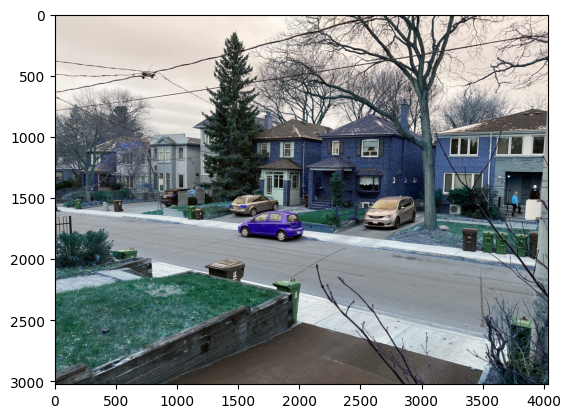

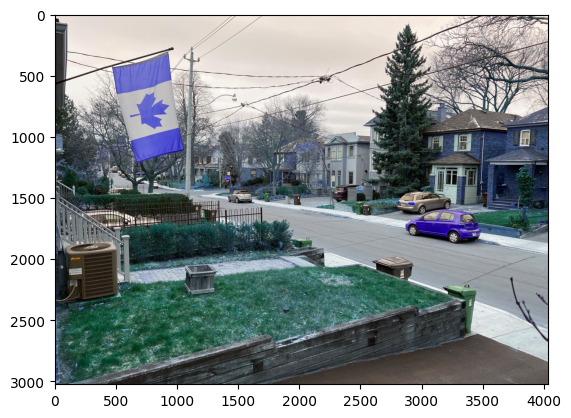

In [8]:
img1 = cv.imread('data/2-right.png')
plt.imshow(img1)
plt.show()
img2 = cv.imread('data/2-left.png')
plt.imshow(img2)
plt.show()

In [9]:
# Extract features

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None) # locations and descriptor
kp2, des2 = sift.detectAndCompute(img2, None)

# orb = cv.ORB_create()
# kp1, des1 = orb.detectAndCompute(img1, None) # locations and descriptor
# kp2, des2 = orb.detectAndCompute(img2, None)

In [10]:
# Find matches

# FLANN_INDEX_LSH = 6
# index_params = dict(algorithm = FLANN_INDEX_LSH, table_number = 6)
# search_params = dict(checks=50)
# flann = cv.FlannBasedMatcher(index_params, search_params)
# matches = flann.knnMatch(des1, des2, k=2)

# good = []
# for match in matches:
#     if len(match) < 2: continue
#     m, n = match[0], match[1]
#     if m.distance < 0.75*n.distance:
#         good.append(m)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m in matches:
    if (m[0].distance < 0.5*m[1].distance):
        good.append(m)
matches = np.asarray(good)

len(good)

6069

In [11]:
# Use RANSAC to estimate homography

# src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
# dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

src_pts = np.float32([kp1[m.queryIdx].pt for m in matches[:, 0]]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches[:, 0]]).reshape(-1, 1, 2)

# src_pts = np.float32(points1)
# dst_pts = np.float32(points2)

H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
H

array([[ 4.84617428e-01, -1.94077807e-02,  1.63347999e+03],
       [-1.74165637e-01,  8.35470125e-01,  2.03036051e+02],
       [-1.27950030e-04,  1.78613056e-06,  1.00000000e+00]])

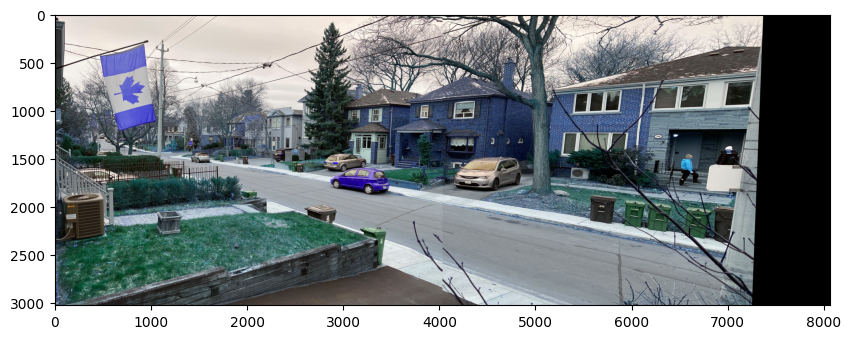

In [18]:
# Perform image stitching

img = cv.warpPerspective(img1, H, ((img1.shape[1] + img2.shape[1]), img2.shape[0])) # warped image
img[0:img2.shape[0], 0:img2.shape[1]] = img2 # stitched image

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()